# Intro to R

As a demo of the language, plot sin and cos on the same axis:

In [100]:
# set up the default plot height and width (this is just for aesthetics)
library('repr')
options(repr.plot.width=6, repr.plot.height=5)

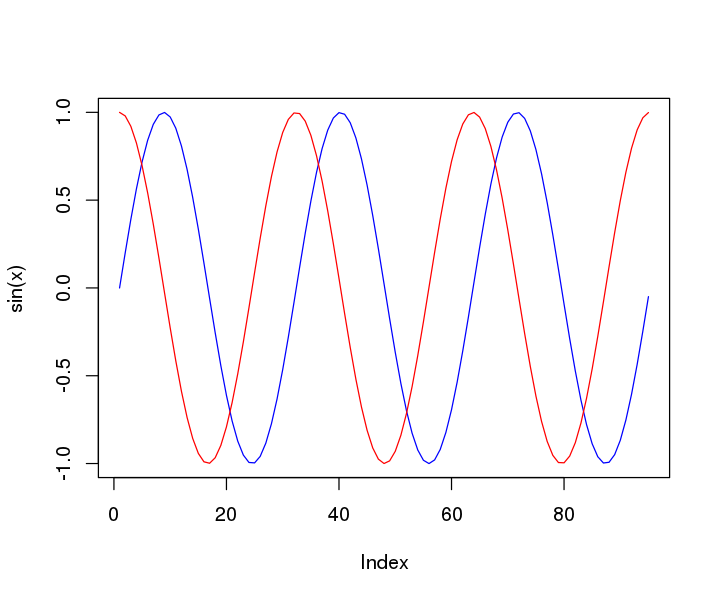

In [105]:
# define a sequence of points (start, end, by)
x = seq(0, 6*pi, .2)

# plot the sin of these points
plot(sin(x), type="l", col="blue")

# add a cos line to the plot
lines(cos(x), col="red")

# Netcdf

The easiest way to load and analyze NetCDF data in R involves the [ncdf4 package](https://cran.r-project.org/web/packages/ncdf4/ncdf4.pdf "ncdf4 Docs"). 

In [106]:
library('ncdf4')

data_url = 'http://hydromet-thredds.princeton.edu/thredds/dodsC/MonitoringStations/CR1000_Table1.nc'
variable = 'AirTC_Avg'

ds = nc_open(data_url)

In [107]:
AirT.data = ncvar_get(ds, variable)
AirT.units = ncatt_get(ds, variable, 'units')$value

In [108]:
time.data = ncvar_get(ds, 'time')
time.units = ncatt_get(ds, 'time', 'units')$value
print(time.units)

[1] "seconds since 1970-01-01"


In [109]:
time = as.POSIXct(time.data, origin="1970-01-01")

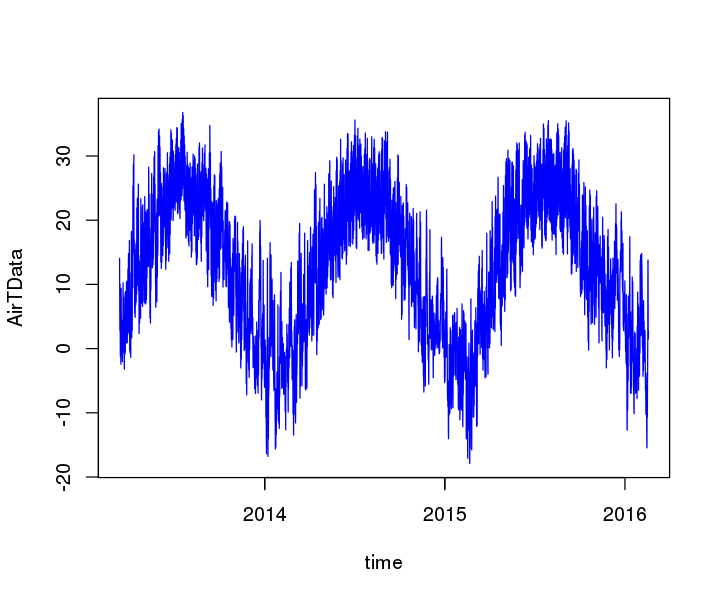

In [110]:
plot(time, AirTData, type="l", col="blue")